In [1]:
!conda install -cf conda-forge pyogrio
!pip install geopandas



Error while loading conda entry point: conda-libmamba-solver (dlopen(/opt/anaconda3/lib/python3.11/site-packages/libmambapy/bindings.cpython-311-darwin.so, 0x0002): Library not loaded: @rpath/libarchive.20.dylib
  Referenced from: <496442DC-0EDE-3705-A2B5-401A4FC0D733> /opt/anaconda3/lib/libmamba.2.0.0.dylib
  Reason: tried: '/opt/anaconda3/lib/libarchive.20.dylib' (no such file), '/opt/anaconda3/lib/python3.11/site-packages/libmambapy/../../../libarchive.20.dylib' (no such file), '/opt/anaconda3/lib/python3.11/site-packages/libmambapy/../../../libarchive.20.dylib' (no such file), '/opt/anaconda3/bin/../lib/libarchive.20.dylib' (no such file), '/opt/anaconda3/bin/../lib/libarchive.20.dylib' (no such file), '/usr/local/lib/libarchive.20.dylib' (no such file), '/usr/lib/libarchive.20.dylib' (no such file, not in dyld cache))
Error while loading conda entry point: conda-libmamba-solver (dlopen(/opt/anaconda3/lib/python3.11/site-packages/libmambapy/bindings.cpython-311-darwin.so, 0x0002): 

In [3]:
!pip install owslib geopandas matplotlib ipyleaflet
from owslib.wfs import WebFeatureService
wfs = WebFeatureService(url='https://ows.emodnet-bathymetry.eu/wfs')
wfs

  Using cached traittypes-0.2.1-py2.py3-none-any.whl.metadata (1.0 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 10.4 MB/s eta 0:00:00
Using cached traittypes-0.2.1-py2.py3-none-any.whl (8.6 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 11.0 MB/s eta 0:00:00

[notice] A new release of pip is available: 24.3.1 -> 25.2
[notice] To update, run: pip install --upgrade pip


In [4]:
[operation.name for operation in wfs.operations]
wfs.version

'1.0.0'

In [5]:
list(wfs.contents)

['emodnet:download_tiles',
 'emodnet:contours',
 'emodnet:hr_bathymetry_area',
 'emodnet:quality_index',
 'world:sea_names',
 'emodnet:source_references',
 'gebco:undersea_features']

In [9]:
wfs.get_schema('emodnet:contours')
response = wfs.getfeature(typename="emodnet:contours", bbox=(54.521,7.084,58.692,15.196), srsname='urn:x-ogc:def:crs:EPSG:4326')

ServiceException: Feature type :e unknown

In [10]:

response = wfs.getfeature(typename="emodnet:contours", bbox=(54.521,7.084,58.692,15.196))

ServiceException: Feature type :e unknown

In [ ]:
out = open('~/Temp/quality_index.gml', 'wb')
out.write(bytes(response.read(), 'UTF-8'))
out.close()

In [11]:
!pip install geopandas
import geopandas as gpd
df = gpd.read_file("~/Temp/dk_coast_quality.geojson")


[notice] A new release of pip is available: 24.3.1 -> 25.2
[notice] To update, run: pip install --upgrade pip


  Using cached geoplot-0.5.1-py3-none-any.whl.metadata (1.7 kB)
  Using cached pyshp-2.3.1-py2.py3-none-any.whl.metadata (55 kB)
Using cached geoplot-0.5.1-py3-none-any.whl (28 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 882.2/882.2 kB 8.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.0/11.0 MB 11.4 MB/s eta 0:00:00 0:00:01
Using cached pyshp-2.3.1-py2.py3-none-any.whl (46 kB)

[notice] A new release of pip is available: 24.3.1 -> 25.2
[notice] To update, run: pip install --upgrade pip


<GeoAxes: >

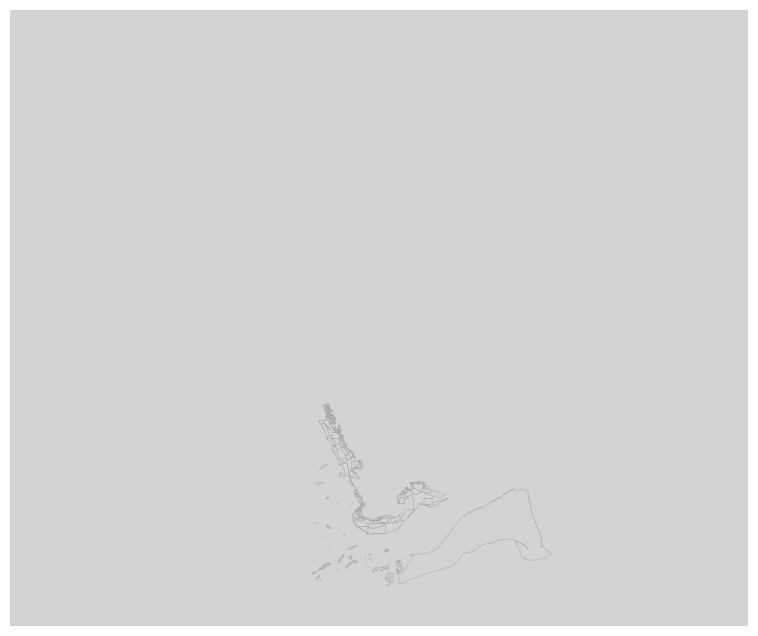

In [12]:
!pip install geoplot

import geoplot
import geoplot.crs as gcrs
geoplot.polyplot(
    df,
    projection=gcrs.AlbersEqualArea(),
    edgecolor='darkgrey',
    facecolor='lightgrey',
    linewidth=.3,
    figsize=(12, 8)
)

In [14]:
from owslib.wfs import WebFeatureService
import geopandas as gpd
from shapely.geometry import shape
from ipyleaflet import Map, GeoData, basemaps

# Define the WFS service URL
wfs_url = "https://ows.emodnet-bathymetry.eu/wfs"

# Initialize the WFS client for version 1.0.0
wfs = WebFeatureService(url=wfs_url, version="1.0.0")

# List available feature types
feature_types = list(wfs.contents)
print("Available feature types:", feature_types)

# Define the layer (feature type) you want to query
layer = "your-layer-name-here"

# Define the BBOX covering Denmark (approximate coordinates: minx, miny, maxx, maxy)
bbox = (8.0, 54.5, 15.0, 57.8)

# Perform a GetFeature request with the BBOX filter
response = wfs.getfeature(
    typename=layer,
    bbox=bbox,
    outputFormat="json"  # You can specify the format (e.g., "json", "gml", etc.)
)

# Read the response data (assumes JSON output)
features = response.read()

# Convert the response to a GeoDataFrame
features_dict = json.loads(features)
features_gdf = gpd.GeoDataFrame.from_features(features_dict['features'])

# Check the coordinate reference system (CRS)
if features_gdf.crs is None:
    features_gdf.set_crs(epsg=4326, inplace=True)  # Assuming WGS 84 (EPSG:4326)

# Display the first few rows of the GeoDataFrame
print(features_gdf.head())

# Visualize the data on a map using ipyleaflet
center = [55.6761, 12.5683]  # Center map on Copenhagen, Denmark

m = Map(center=center, zoom=6, basemap=basemaps.OpenStreetMap.Mapnik)

geo_data = GeoData(geo_dataframe=features_gdf, style={'color': 'blue', 'opacity': 1, 'weight': 1.5},
                   hover_style={'color': 'red', 'fillOpacity': 0.7},
                   name="WFS Layer")

m.add_layer(geo_data)
m


Available feature types: ['emodnet:download_tiles', 'emodnet:contours', 'emodnet:hr_bathymetry_area', 'emodnet:quality_index', 'world:sea_names', 'emodnet:source_references', 'gebco:undersea_features']


ServiceException: Feature type :y unknown